In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras import Sequential
from tensorflow.keras.losses  import MeanSquaredError, BinaryCrossentropy
from tensorflow.keras.activations import sigmoid



In [7]:
X_train = np.array([[1.0], [2.0]], dtype=np.float32)          
Y_train = np.array([[300.0], [500.0]], dtype=np.float32) 

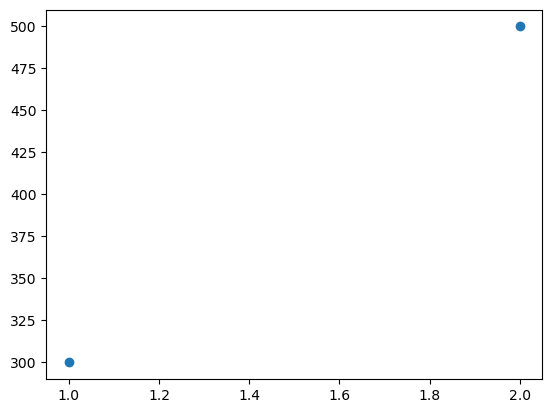

In [8]:
plt.scatter(X_train, Y_train)

In [9]:
linear_layer = tf.keras.layers.Dense(units=1,activation='linear')

In [10]:
linear_layer.get_weights

<bound method Layer.get_weights of <Dense name=dense, built=False>>

In [13]:
a1=linear_layer(X_train[0].reshape(1,1))
print(a1)

tf.Tensor([[0.505875]], shape=(1, 1), dtype=float32)


In [15]:
w,b = linear_layer.get_weights()
print(w,b)

[[0.505875]] [0.]


In [18]:
set_w = np.array([[200]])
set_b = np.array([100])
linear_layer.set_weights([set_w,set_b])
print(linear_layer.get_weights())

[array([[200.]], dtype=float32), array([100.], dtype=float32)]


In [19]:
a1 = linear_layer(X_train[0].reshape(1,1))
print(a1)
a1lr = np.dot(X_train[0].reshape(1,1),set_w)+set_b
print(a1lr)

tf.Tensor([[300.]], shape=(1, 1), dtype=float32)
[[300.]]


In [20]:
prediction_tf = linear_layer(X_train)


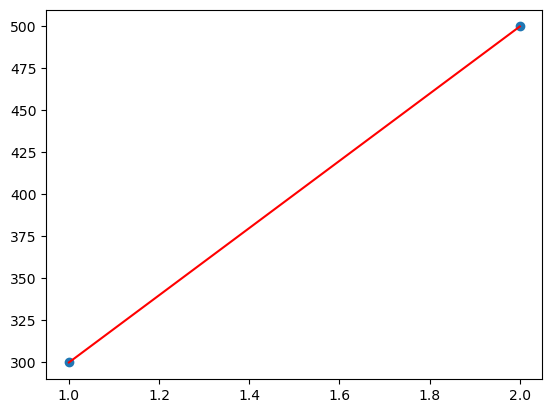

In [22]:
plt.scatter(X_train, Y_train)
plt.plot(X_train,prediction_tf, color='red')

unit with sigmoid activation

In [23]:
X_train = np.array([0., 1, 2, 3, 4, 5], dtype=np.float32).reshape(-1,1)  # 2-D Matrix
Y_train = np.array([0,  0, 0, 1, 1, 1], dtype=np.float32).reshape(-1,1)  # 2-D Matrix

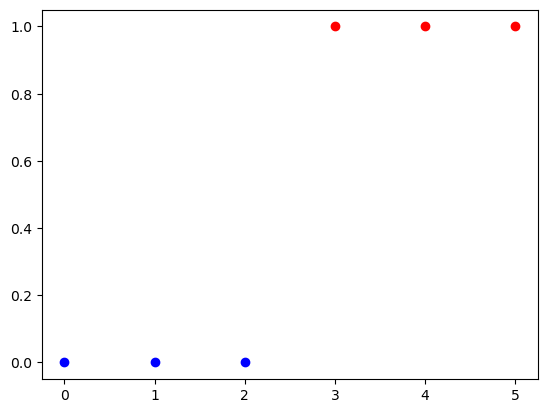

In [26]:
plt.scatter(X_train[Y_train.flatten() == 0], Y_train[Y_train.flatten() == 0], c='blue', label='Class 0')
plt.scatter(X_train[Y_train.flatten() == 1], Y_train[Y_train.flatten() == 1], c='red', label='Class 1')

In [27]:
model = Sequential(
    [
        tf.keras.layers.Dense(1,input_dim=1,activation='sigmoid',name='L1')
    ]
)

c:\Users\ABHIJITH\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [28]:
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ L1 (Dense)                      │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

In [30]:
logistic_layer = model.get_layer('L1')
w,b = model.get_weights()
print(w,b)

[[-0.8798973]] [0.]


In [32]:
set_w=np.array([[2]])
set_b=np.array([-4.5])
logistic_layer.set_weights([set_w,set_b])
print(logistic_layer.get_weights())


[array([[2.]], dtype=float32), array([-4.5], dtype=float32)]


In [33]:
a1 = model.predict(X_train[0].reshape(1,1))
print(a1)

def sigmoid(z):
    return 1 / (1 + np.exp(-z))
a1lg = sigmoid(np.dot(X_train[0].reshape(1,1),set_w)+set_b)
print(a1lg)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 298ms/step
[[0.01098694]]
[[0.01098694]]


In [34]:
predicted_y = model.predict(X_train)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


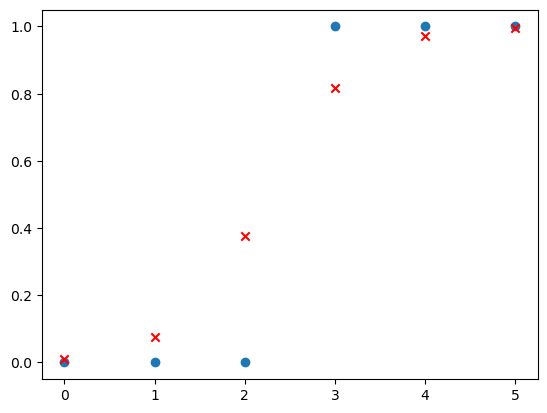

In [36]:
plt.scatter(X_train, Y_train)
plt.scatter(X_train,predicted_y,c='r',marker = 'x')